<a href="https://colab.research.google.com/github/Uzmamushtaque/ML-with-Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
from sklearn.datasets import make_circles
n_samples=500
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [4]:
X

array([[-0.75093268,  0.2983924 ],
       [-0.20283523,  0.97779788],
       [-0.7827143 ,  0.02454953],
       [-0.69379555, -0.66860511],
       [-0.84145025,  0.55789191],
       [-0.70369963, -0.37579276],
       [-0.78560088, -0.00610819],
       [-0.98464139,  0.05694925],
       [-0.15785954,  0.9644189 ],
       [ 0.23086247, -0.79886668],
       [ 0.97783586,  0.21137   ],
       [ 0.19954351, -1.02542268],
       [-0.52258086, -0.59155599],
       [-0.55158646,  0.83278712],
       [-0.73742241,  0.07908682],
       [-0.74179558, -0.26227164],
       [ 0.7909894 , -0.11544299],
       [ 0.73049095,  0.6993851 ],
       [-0.01993179,  0.74067282],
       [-0.49194164, -0.57417168],
       [ 0.76383365, -0.21538361],
       [ 0.81093177, -0.17254725],
       [ 0.53715295,  0.55852977],
       [-0.67617801,  0.39339983],
       [-0.35162528,  0.90273032],
       [ 0.4357213 , -0.56685717],
       [ 0.75137715, -0.0855435 ],
       [ 0.56863687, -0.83433166],
       [-0.82953874,

In [5]:
y[:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [6]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,-0.750933,0.298392,1
1,-0.202835,0.977798,0
2,-0.782714,0.024550,1
3,-0.693796,-0.668605,0
4,-0.841450,0.557892,0


In [7]:
circles.label.value_counts()

1    250
0    250
Name: label, dtype: int64

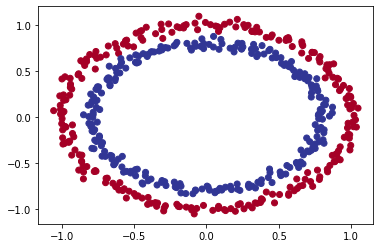

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((500, 2), (500,))

In [10]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)]) # create the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])#compile the model
model_1.fit(X,y,epochs=5) #fit the model

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 3.3314 - accuracy: 0.5200
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.5040
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.7635 - accuracy: 0.4940
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.4980
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.4960


In [11]:
model_1.fit(X,y,epochs=100,verbose=0)
model_1.evaluate(X,y)

16/16 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4960


[0.6931490302085876, 0.4959999918937683]

After training for 100 epochs, the model is equivalent to random guessing(50% accuracy). Lets add layers to the model.

In [12]:
model_2=tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)]) # create the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])#compile the model
model_2.fit(X,y,epochs=100,verbose=0) #fit the model

In [13]:
model_2.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619007110596, 0.5]

In [15]:
model_3=tf.keras.Sequential([tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1,input_shape=(None,1))])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [16]:
model_3.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4920


[0.693361222743988, 0.492000013589859]

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


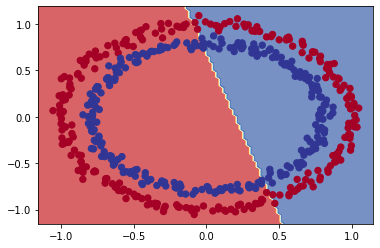

In [18]:
plot_decision_boundary(model_3,X,y)

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 4.2939 - accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 4.1182 - accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 4.0328 - accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 3.9100 - accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 3.7819 - accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 3.7436 - accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 3.6582 - accuracy: 0.5000
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 3.4948 - accuracy: 0.5000
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 3.4383 - accuracy: 0.5000
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 3.3881 - accuracy: 0.5000
Epoch 11/

doing binary classifcation...


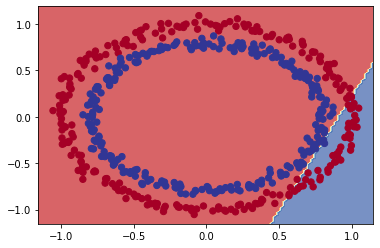

In [20]:
plot_decision_boundary(model_4, X, y)

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=25, verbose=0)

# Evaluate our model
model_7.evaluate(X, y)

16/16 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9980


[0.14094896614551544, 0.9980000257492065]

doing binary classifcation...


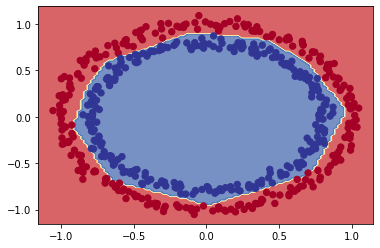

In [32]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [33]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694453,0.470
1,0.688541,0.502
2,0.685807,0.532
3,0.682144,0.538
4,0.677651,0.550
5,0.673336,0.540
6,0.667987,0.566
7,0.662533,0.588
8,0.649994,0.594
9,0.638410,0.638


Text(0.5, 1.0, 'Model Training Curves')

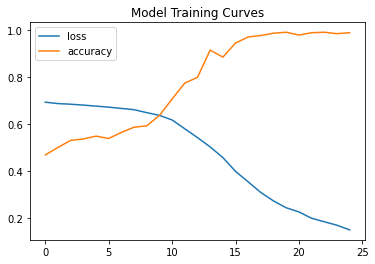

In [34]:
pd.DataFrame(history.history).plot()
plt.title("Model Training Curves")

In [35]:
X_train,y_train=X[:400],y[:400]
X_test,y_test=X[400:],y[400:]
X_train.shape,X_test.shape

((400, 2), (100, 2))

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),# with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      verbose=0
                      #callbacks=[lr_scheduler]
                      )

In [44]:
loss,accuracy=model_9.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 1.0000


doing binary classifcation...
doing binary classifcation...


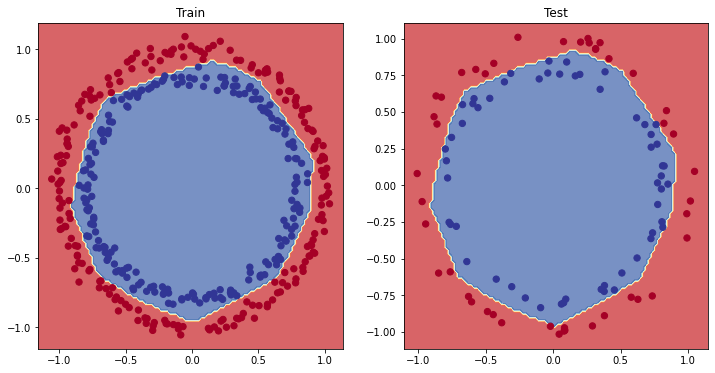

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

# Multiclass Classification

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels), (test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
train_data.shape,train_labels.shape, test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

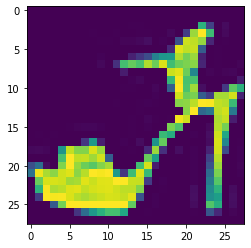

In [48]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [49]:
train_labels[9]

5

## Dataset description

[Link](https://github.com/zalandoresearch/fashion-mnist#labels)

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

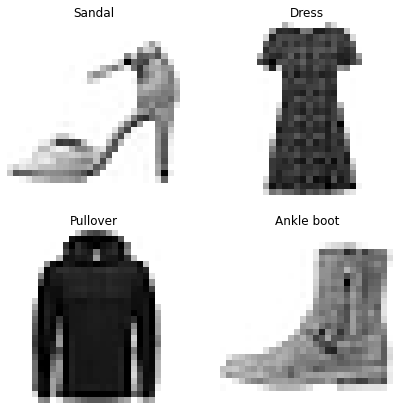

In [51]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)